# Load dataset

In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_folder = '/content/drive/MyDrive/Dataset Citra NoBG'
csv_file = '/content/drive/MyDrive/Dataset Citra NoBG/Label Citra 27 mar.csv'
df = pd.read_csv(csv_file)

label_names = df.columns[1:].tolist() #nama label (list)
filenames = df['filename'].tolist() #nama file (list)
Y = df.drop(columns=['filename']).values #label biner (array 2D)

# EDA

## Jumlah label

<ipython-input-4-6cd2b806ad38>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')


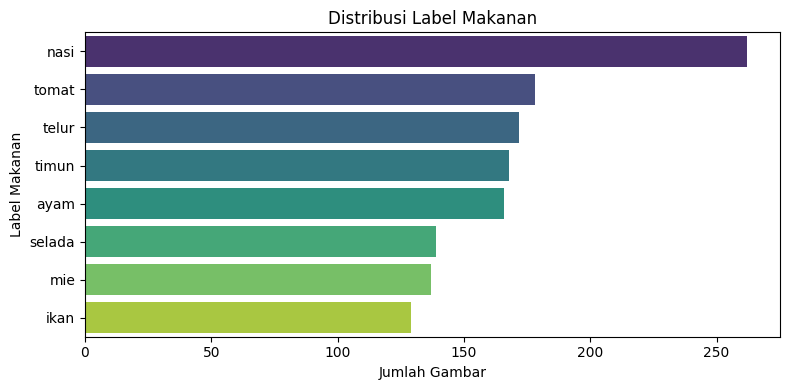

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df[label_names].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=label_counts.values, y=label_counts.index, palette='viridis')
plt.title('Distribusi Label Makanan')
plt.xlabel('Jumlah Gambar')
plt.ylabel('Label Makanan')
plt.tight_layout()
plt.show()

## Sample gambar setiap label

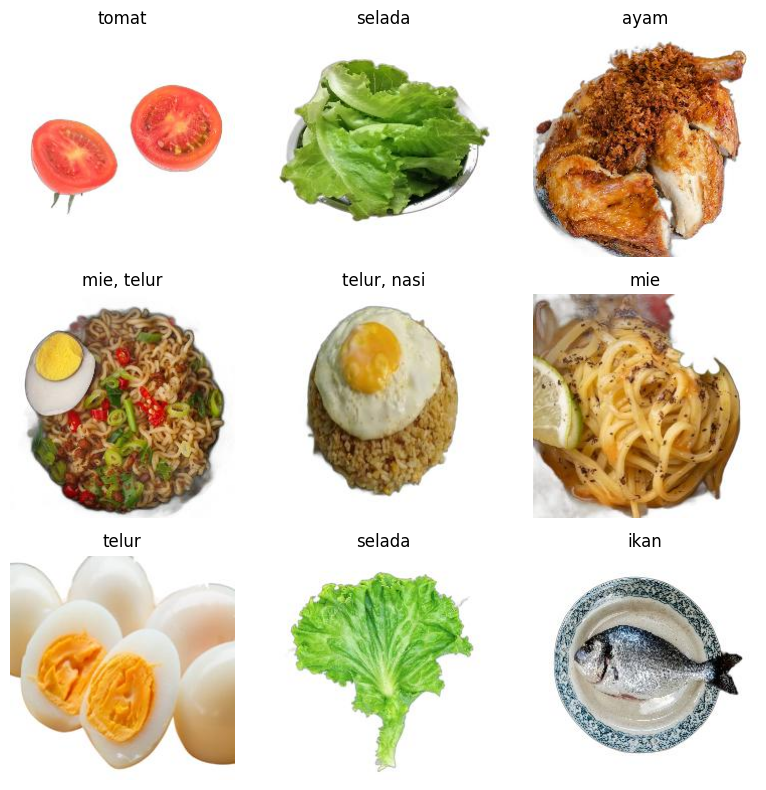

In [ ]:
import numpy as np

plt.figure(figsize=(8, 8))
for i in range(9):
    idx = np.random.randint(0, len(filenames))
    img_path = os.path.join(image_folder, filenames[idx])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = ', '.join([label_names[j] for j, val in enumerate(Y[idx]) if val == 1])
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing

In [ ]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.8 MB/s eta 0:00:00


## Remove background + Resize
Tidak perlu dirun lagi, karena hasil sudah tersimpan di drive, langsung ke Augmentasi.

In [ ]:
import os
import io
import cv2
import gc
from PIL import Image
from rembg import remove
from tqdm import tqdm

image_folder = '/content/drive/MyDrive/Dataset Citra 2'
output_folder = '/content/drive/MyDrive/Dataset Citra NoBG'
os.makedirs(output_folder, exist_ok=True)

resize_size = (224, 224)
batch_size = 20

for i in range(0, len(filenames), batch_size):
    batch = filenames[i:i+batch_size]
    print(f'Processing batch {i//batch_size + 1} ({len(batch)} images)...')

    for filename in tqdm(batch):
        img_path = os.path.join(image_folder, filename)
        save_path = os.path.join(output_folder, filename)

        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Gagal baca {filename}")
                continue

            img_resized = cv2.resize(img, resize_size)

            _, buffer = cv2.imencode('.png', img_resized)
            output_image = remove(buffer.tobytes())

            img_pil = Image.open(io.BytesIO(output_image)).convert("RGBA")
            white_bg = Image.new("RGB", img_pil.size, (255, 255, 255))
            white_bg.paste(img_pil, mask=img_pil.split()[3])

            white_bg.save(save_path)

        except Exception as e:
            print(f"Gagal proses {filename}: {e}")

    gc.collect()

Processing batch 1 (20 images)...


100%|██████████| 20/20 [00:34<00:00,  1.73s/it]


Processing batch 2 (20 images)...


100%|██████████| 20/20 [00:30<00:00,  1.55s/it]


Processing batch 3 (20 images)...


100%|██████████| 20/20 [00:29<00:00,  1.46s/it]


Processing batch 4 (20 images)...


100%|██████████| 20/20 [00:27<00:00,  1.40s/it]


Processing batch 5 (20 images)...


100%|██████████| 20/20 [00:29<00:00,  1.47s/it]


Processing batch 6 (20 images)...


100%|██████████| 20/20 [00:31<00:00,  1.59s/it]


Processing batch 7 (20 images)...


100%|██████████| 20/20 [00:31<00:00,  1.56s/it]


Processing batch 8 (20 images)...


100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


Processing batch 9 (20 images)...


100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


Processing batch 10 (20 images)...


100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


Processing batch 11 (20 images)...


100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


Processing batch 12 (20 images)...


100%|██████████| 20/20 [00:25<00:00,  1.26s/it]


Processing batch 13 (20 images)...


100%|██████████| 20/20 [00:23<00:00,  1.20s/it]


Processing batch 14 (20 images)...


100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


Processing batch 15 (20 images)...


100%|██████████| 20/20 [00:27<00:00,  1.38s/it]


Processing batch 16 (20 images)...


100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


Processing batch 17 (20 images)...


100%|██████████| 20/20 [00:28<00:00,  1.45s/it]


Processing batch 18 (20 images)...


100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


Processing batch 19 (20 images)...


100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


Processing batch 20 (20 images)...


100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


Processing batch 21 (20 images)...


100%|██████████| 20/20 [00:26<00:00,  1.31s/it]


Processing batch 22 (20 images)...


100%|██████████| 20/20 [00:22<00:00,  1.14s/it]


Processing batch 23 (20 images)...


100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


Processing batch 24 (20 images)...


100%|██████████| 20/20 [00:30<00:00,  1.55s/it]


Processing batch 25 (20 images)...


100%|██████████| 20/20 [00:31<00:00,  1.57s/it]


Processing batch 26 (20 images)...


100%|██████████| 20/20 [00:30<00:00,  1.55s/it]


Processing batch 27 (20 images)...


100%|██████████| 20/20 [00:29<00:00,  1.48s/it]


Processing batch 28 (20 images)...


100%|██████████| 20/20 [00:32<00:00,  1.62s/it]


Processing batch 29 (20 images)...


100%|██████████| 20/20 [00:31<00:00,  1.57s/it]


Processing batch 30 (20 images)...


100%|██████████| 20/20 [00:34<00:00,  1.72s/it]


Processing batch 31 (20 images)...


100%|██████████| 20/20 [00:35<00:00,  1.79s/it]


Processing batch 32 (20 images)...


100%|██████████| 20/20 [00:36<00:00,  1.82s/it]


Processing batch 33 (20 images)...


100%|██████████| 20/20 [00:35<00:00,  1.76s/it]


Processing batch 34 (20 images)...


100%|██████████| 20/20 [00:31<00:00,  1.58s/it]


Processing batch 35 (20 images)...


100%|██████████| 20/20 [00:28<00:00,  1.40s/it]


Processing batch 36 (20 images)...


100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


Processing batch 37 (20 images)...


100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


Processing batch 38 (20 images)...


100%|██████████| 20/20 [00:27<00:00,  1.37s/it]


Processing batch 39 (20 images)...


100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


Processing batch 40 (20 images)...


100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


Processing batch 41 (20 images)...


100%|██████████| 20/20 [00:29<00:00,  1.45s/it]


Processing batch 42 (20 images)...


100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


Processing batch 43 (20 images)...


100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


Processing batch 44 (20 images)...


100%|██████████| 20/20 [00:28<00:00,  1.41s/it]


Processing batch 45 (20 images)...


100%|██████████| 20/20 [00:28<00:00,  1.45s/it]


Processing batch 46 (20 images)...


100%|██████████| 20/20 [00:30<00:00,  1.53s/it]


Processing batch 47 (20 images)...


100%|██████████| 20/20 [00:29<00:00,  1.49s/it]


Processing batch 48 (20 images)...


100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


Processing batch 49 (20 images)...


100%|██████████| 20/20 [00:32<00:00,  1.62s/it]


Processing batch 50 (2 images)...


100%|██████████| 2/2 [00:03<00:00,  1.77s/it]


## Augmentasi

In [ ]:
import random
import os
import numpy as np
import cv2
from tqdm import tqdm

resize_size = (224, 224)
resized_images = []
augmented_images = []
Y_aug = []

for idx, filename in enumerate(tqdm(filenames)):
    img_path = os.path.join(image_folder, filename)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Gagal buka {filename}")
        continue

    # Resize
    img_resized = cv2.resize(img, resize_size)
    resized_images.append(img_resized)

    # Augmentasi
    img_aug = img_resized.copy()

    # Flip horizontal
    if random.random() > 0.5:
        img_aug = cv2.flip(img_aug, 1)

    # Rotasi ±20°
    angle = random.uniform(-20, 20)
    h, w = img_aug.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
    img_aug = cv2.warpAffine(img_aug, M, (w, h))

    # Brightness
    brightness_shift = random.randint(-40, 40)
    img_aug = cv2.convertScaleAbs(img_aug, alpha=1, beta=brightness_shift)

    # Kontras
    contrast_factor = random.uniform(0.8, 1.2)
    img_aug = cv2.convertScaleAbs(img_aug, alpha=contrast_factor, beta=0)

    # Gaussian Blur
    if random.random() > 0.8:
        k = random.choice([3, 5])
        img_aug = cv2.GaussianBlur(img_aug, (k, k), 0)

    # Noise (Gaussian)
    if random.random() > 0.7:
        noise = np.random.normal(0, 10, img_aug.shape).astype(np.uint8)
        img_aug = cv2.add(img_aug, noise)

    # Zoom (crop lalu resize)
    if random.random() > 0.7:
        scale = random.uniform(1.1, 1.3)
        new_w = int(w / scale)
        new_h = int(h / scale)
        x1 = random.randint(0, w - new_w)
        y1 = random.randint(0, h - new_h)
        img_aug = img_aug[y1:y1+new_h, x1:x1+new_w]
        img_aug = cv2.resize(img_aug, (w, h))

    augmented_images.append(img_aug)
    Y_aug.append(Y[idx])  # Copy label sesuai gambar yang di-augmentasi

# Gabungkan semua gambar dan label
all_images = np.array(resized_images + augmented_images)
Y = np.vstack([Y, np.array(Y_aug)])

print(f"Jumlah gambar: {len(all_images)}")
print(f"Shape all_images: {all_images.shape}")
print(f"Shape Y: {Y.shape}")

100%|██████████| 982/982 [06:15<00:00,  2.62it/s]

Jumlah gambar: 1964
Shape all_images: (1964, 224, 224, 3)
Shape Y: (1964, 8)


# Ekstraksi fitur

## Color histogram spasial

In [ ]:
import cv2
import numpy as np

def ekstrak_color_histogram_spasial(image, bins=(8,8,8), grid=(2,2)):
    h, w = image.shape[:2]
    grid_h, grid_w = grid
    step_h = h // grid_h
    step_w = w // grid_w

    hist_features = []

    for row in range(grid_h):
        for col in range(grid_w):
            patch = image[row*step_h:(row+1)*step_h, col*step_w:(col+1)*step_w]

            # Buat mask dari patch, asumsikan background sudah dihapus (pixel background = 0)
            gray_patch = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
            _, mask = cv2.threshold(gray_patch, 1, 255, cv2.THRESH_BINARY)

            hsv_patch = cv2.cvtColor(patch, cv2.COLOR_BGR2HSV)
            hist = cv2.calcHist([hsv_patch], [0,1,2], mask, bins, [0,180,0,256,0,256])
            cv2.normalize(hist, hist)
            hist_features.extend(hist.flatten())

    return np.array(hist_features)

X_hist = []
for img in all_images:
    features = ekstrak_color_histogram_spasial(img, bins=(8,8,8), grid=(2,2))
    X_hist.append(features)

X_hist = np.array(X_hist)
print(f"X_hist.shape = {X_hist.shape}")

X_hist.shape = (1964, 2048)


## HOG

In [ ]:
from skimage.feature import hog

hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'transform_sqrt': True,
    'feature_vector': True
}
X_hog = []

for image in all_images :
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = hog(gray, **hog_params)
    X_hog.append(features)

X_hog = np.array(X_hog)
print(f"X_hog.shape = {X_hog.shape}")

X_hog.shape = (1964, 26244)


## Local Binary Pattern

In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

def ekstrak_lbp_multi_radius(image, points_list=[8,16,24], radius_list=[1,2,3], method='uniform'):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    all_hist = []
    for points, radius in zip(points_list, radius_list):
        lbp = local_binary_pattern(gray, points, radius, method)
        n_bins = int(lbp.max() + 1)
        hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)
        all_hist.extend(hist)

    return np.array(all_hist)

X_lbp = []
for img in all_images:
    features = ekstrak_lbp_multi_radius(img)
    X_lbp.append(features)
X_lbp = np.array(X_lbp)
print(f"Shape fitur LBP: {X_lbp.shape}")

Shape fitur LBP: (1964, 54)


## GLCM

In [ ]:
import cv2
import numpy as np
from skimage.feature.texture import graycomatrix, graycoprops

def ekstrak_glcm_features(image, distances=[1, 2], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256):
    # Pastikan grayscale dengan nilai 0-255 integer
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Quantize gray level ke 'levels' (default 256)
    if gray.max() > levels - 1:
        gray = (gray / (gray.max() / (levels - 1))).astype(np.uint8)
    else:
        gray = gray.astype(np.uint8)

    # Hitung GLCM (co-occurrence matrix)
    glcm = graycomatrix(gray,
                        distances=distances,
                        angles=angles,
                        levels=levels,
                        symmetric=True,
                        normed=True)

    # Ekstrak fitur GLCM: contrast, dissimilarity, homogeneity, energy, correlation, ASM
    fitur_names = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
    fitur = []
    for prop in fitur_names:
        nilai = graycoprops(glcm, prop)
        fitur.extend(nilai.flatten())  # flatten semua jarak dan sudut

    return np.array(fitur)

X_glcm = []
for img in all_images:
    features = ekstrak_glcm_features(img)
    X_glcm.append(features)

X_glcm = np.array(X_glcm)
print(f"Shape fitur GLCM: {X_glcm.shape}")

Shape fitur GLCM: (1964, 48)


## Gabungkan fitur

### Normalisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_hist = StandardScaler()
X_hist_scaled = scaler_hist.fit_transform(X_hist)

In [ ]:
scaler_hog = StandardScaler()
X_hog_scaled = scaler_hog.fit_transform(X_hog)

In [ ]:
scaler_lbp = StandardScaler()
X_lbp_scaled = scaler_lbp.fit_transform(X_lbp)

In [ ]:
scaler_glcm = StandardScaler()
X_glcm_scaled = scaler_glcm.fit_transform(X_glcm)

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca_hog = PCA(n_components=0.95, svd_solver='full')
X_hog_reduced = pca_hog.fit_transform(X_hog_scaled)

print(f"X_hog_reduced.shape = {X_hog_reduced.shape}")

X_hog_reduced.shape = (1964, 1466)


### Simpan file .pkl

In [ ]:
import joblib

joblib.dump(scaler_hist, 'scaler histogram.pkl')
joblib.dump(scaler_hog, 'scaler hog.pkl')
joblib.dump(scaler_lbp, 'scaler lbp.pkl')
joblib.dump(scaler_glcm, 'scaler glcm.pkl')

joblib.dump(pca_hog, 'pca hog.pkl')

['pca hog.pkl']

### Gabung

In [ ]:
print(X_hist_scaled.shape)
print(X_hog_reduced.shape)
print(X_lbp_scaled.shape)
print(X_glcm_scaled.shape)

(1964, 2048)
(1964, 1466)
(1964, 54)
(1964, 48)


In [ ]:
X = np.hstack([X_hist_scaled, X_hog_reduced, X_lbp_scaled, X_glcm_scaled])
print(f"Bentuk akhir fitur gabungan: {X.shape}")

Bentuk akhir fitur gabungan: (1964, 3616)


# Modeling

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## SVC

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score

svm = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
svm.fit(X_train, Y_train)
Y_proba = svm.predict_proba(X_test)

thresholds = np.arange(0.1, 0.6, 0.05)
best_thresholds = []
for i in range(Y_test.shape[1]):
    f1s = []
    for t in thresholds:
        preds = (Y_proba[:, i] >= t).astype(int)
        f1 = f1_score(Y_test[:, i], preds)
        f1s.append(f1)
    best_t = thresholds[np.argmax(f1s)]
    best_thresholds.append(best_t)

best_thresholds = np.array(best_thresholds)
print("Threshold optimal per label:", best_thresholds)

Y_pred_opt = (Y_proba >= best_thresholds).astype(int)
print("\n=== Classification Report dengan Threshold Optimal per Label ===")
print(classification_report(Y_test, Y_pred_opt, zero_division=0))

Threshold optimal per label: [0.2  0.2  0.3  0.25 0.25 0.15 0.2  0.2 ]

=== Classification Report dengan Threshold Optimal per Label ===
              precision    recall  f1-score   support

           0       0.30      0.47      0.37        74
           1       0.24      0.53      0.33        90
           2       0.51      0.36      0.42       124
           3       0.40      0.70      0.51       160
           4       0.38      0.56      0.45        73
           5       0.28      0.71      0.40       119
           6       0.32      0.52      0.39        99
           7       0.42      0.62      0.50        80

   micro avg       0.34      0.57      0.43       819
   macro avg       0.36      0.56      0.42       819
weighted avg       0.36      0.57      0.43       819
 samples avg       0.36      0.61      0.42       819



## Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred_opt)
print(f"Akurasi (Subset accuracy): {accuracy:.4f}")

Akurasi (Subset accuracy): 0.1186


In [ ]:
from sklearn.metrics import hamming_loss

hamming = hamming_loss(Y_test, Y_pred_opt)
print(f"Hamming Loss: {hamming:.4f}")
print(f"Hamming Accuracy (1 - hamming loss): {1 - hamming:.4f}")

Hamming Loss: 0.2665
Hamming Accuracy (1 - hamming loss): 0.7335


In [ ]:
from sklearn.metrics import precision_score

acc_per_label = (Y_test == Y_pred_opt).mean(axis=0)
print(f"Akurasi per label:\n{acc_per_label}")

# Atau rata-ratanya:
print(f"Rata-rata akurasi per label: {acc_per_label.mean():.4f}")

Akurasi per label:
[0.79661017 0.67457627 0.79152542 0.63389831 0.83220339 0.57457627
 0.73389831 0.83050847]
Rata-rata akurasi per label: 0.7335


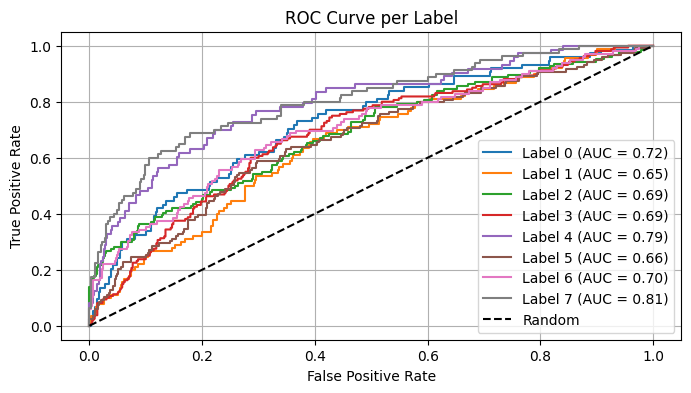

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
n_labels = Y.shape[1]

for i in range(n_labels):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8, 4))
for i in range(n_labels):
    plt.plot(fpr[i], tpr[i], label=f'Label {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve per Label')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

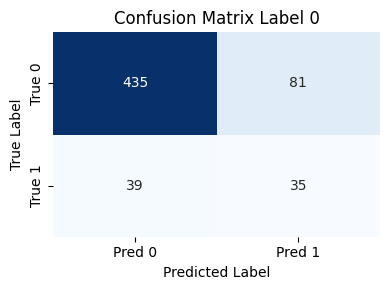

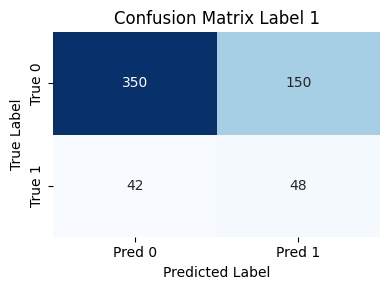

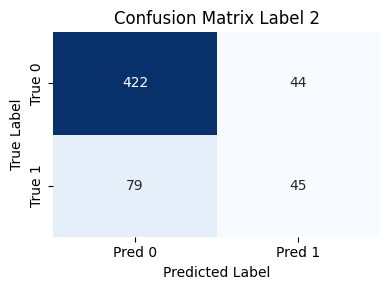

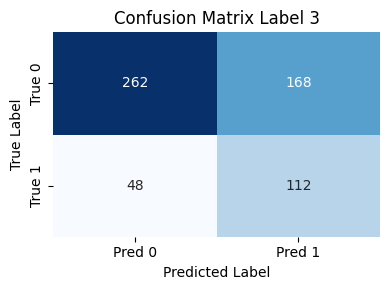

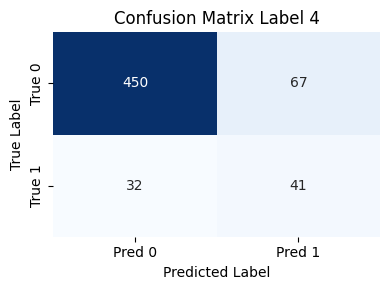

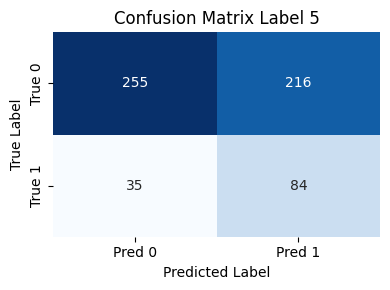

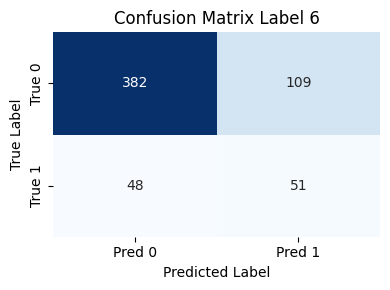

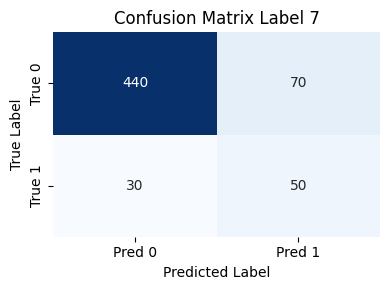

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

conf_matrices = multilabel_confusion_matrix(Y_test, Y_pred_opt)

for i, cm in enumerate(conf_matrices):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix Label {i}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Simpan Model

In [ ]:
joblib.dump(svm, 'Model PMD final.pkl')
joblib.dump(best_thresholds, 'Thresholds final.pkl')

['Thresholds final.pkl']

# Sistem prediksi nilai gizi

## Estimasi kandungan gizi

In [ ]:
!pip install rembg onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.7 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from rembg import remove
from skimage.feature import hog, local_binary_pattern
from skimage.feature.texture import graycomatrix, graycoprops
from google.colab import drive

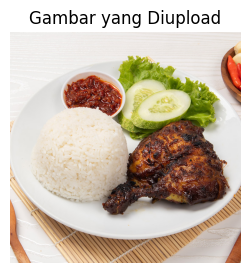

✅ Makanan terdeteksi: ['nasi', 'ayam', 'timun', 'selada']

🔎 Dengan asumsi:
• nasi: 105 gram
• ayam: 85 gram
• timun: 1 iris
• selada: 1 daun sedang

📊 Perkiraan Total Nilai Gizi:
- Energi: 1419.00 kj
- Kalori: 338.00 kkal
- Lemak: 11.78 gram
- Karbohidrat: 29.69 gram
- Protein: 25.91 gram

📈 Rincian Kalori:


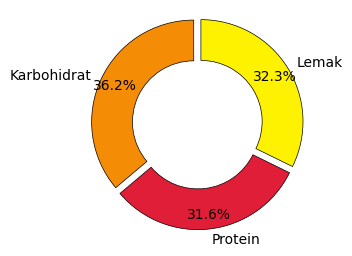

In [ ]:
# === Load model dan alat preprocessing ===
svm = joblib.load('Model PMD 28 mar.pkl')
thresholds = joblib.load('Thresholds 28 mar.pkl')
df_gizi = pd.read_csv("Nilai Gizi.csv")
label_names = ['mie', 'telur', 'tomat', 'nasi', 'ikan', 'ayam', 'timun', 'selada']

# === Load scaler dan PCA masing-masing fitur ===
scaler_hist = joblib.load('scaler histogram.pkl')
scaler_hog = joblib.load('scaler hog.pkl')
scaler_lbp = joblib.load('scaler lbp.pkl')
scaler_glcm = joblib.load('scaler glcm.pkl')
pca_hog = joblib.load('pca hog.pkl')

# === HOG Parameter ===
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'transform_sqrt': True,
    'feature_vector': True
}

# === Fungsi preprocessing ===
def remove_background(img_bgr):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    result = remove(img_rgb)
    result_bgr = cv2.cvtColor(result, cv2.COLOR_RGBA2BGR)
    return result_bgr

# === Ekstraksi fitur gabungan (dengan scaling + PCA) ===
def ekstrak_fitur(img):
    # Histogram spasial
    hist = ekstrak_color_histogram_spasial(img)
    hist_scaled = scaler_hist.transform([hist])

    # HOG
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hog_feat = hog(gray, **hog_params)
    hog_scaled = scaler_hog.transform([hog_feat])
    hog_pca = pca_hog.transform(hog_scaled)

    # LBP
    lbp_feat = ekstrak_lbp_multi_radius(img)
    lbp_scaled = scaler_lbp.transform([lbp_feat])

    # GLCM
    glcm_feat = ekstrak_glcm_features(gray)
    glcm_scaled = scaler_glcm.transform([glcm_feat])

    fitur = np.hstack([hist_scaled[0], hog_pca[0], lbp_scaled[0], glcm_scaled[0]])
    return fitur

# === Tampilkan gambar ===
def tampilkan_gambar(gambar, judul):
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
    plt.title(judul)
    plt.axis('off')
    plt.show()

# === Fungsi klasifikasi + estimasi gizi ===
def prediksi_dan_gizi_handcrafted(img_path):
    image = cv2.imread(img_path)
    img_rill = image.copy()
    if image is None:
        print("⚠️ Gambar gagal dibuka.")
        return None

    image = cv2.resize(image, (224, 224))
    image = remove_background(image)

    tampilkan_gambar(img_rill, "Gambar yang Diupload")

    fitur = ekstrak_fitur(image).reshape(1, -1)
    probs = svm.predict_proba(fitur)[0]
    pred = (probs >= thresholds).astype(int)
    pred_labels = [label for label, val in zip(label_names, pred) if val == 1]

    print("✅ Makanan terdeteksi:", pred_labels)
    if not pred_labels:
        print("❌ Tidak ada makanan terdeteksi.")
        return None

    df_terpilih = df_gizi[df_gizi['nama'].isin(pred_labels)]
    asumsi = df_terpilih[['nama', 'takaran saji']]
    gizi_total = df_terpilih.drop(columns='nama').sum(numeric_only=True)
    satuan = ["kj", "kkal", "gram", "gram", "gram"]

    print("\n🔎 Dengan asumsi:")
    for nama, takaran in zip(asumsi['nama'], asumsi['takaran saji']):
        print(f"• {nama}: {takaran}")

    print("\n📊 Perkiraan Total Nilai Gizi:")
    for nutrisi, nilai, satuan_gizi in zip(gizi_total.index, gizi_total.values, satuan):
        print(f"- {nutrisi.capitalize()}: {nilai:.2f} {satuan_gizi}")

    karbo = gizi_total['karbohidrat'] * 4
    protein = gizi_total['protein'] * 4
    lemak = gizi_total['lemak'] * 9
    total_energi = karbo + protein + lemak

    # Visualisasi pie chart
    labels = ['Karbohidrat', 'Protein', 'Lemak']
    energi = [karbo, protein, lemak]
    persen = [e / total_energi * 100 for e in energi]
    colors = ['#f48c06', '#e01e37', '#fff200']
    explode = (0.04, 0.04, 0.04)

    print("\n📈 Rincian Kalori:")
    plt.figure(figsize=(3, 3))
    plt.pie(persen, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode,
            startangle=90, pctdistance=0.85,
            wedgeprops={'width': 0.4, 'edgecolor': 'black', 'linewidth': 0.5})
    plt.axis('equal')
    plt.show()

    return gizi_total

img_path = '/content/drive/MyDrive/Dataset Citra 2/test 3.jpg'
gizi_dari_gambar = prediksi_dan_gizi_handcrafted(img_path)

## Menghitung AKG

Masukkan data diri Anda untuk menghitung kebutuhan gizi harian:
Jenis kelamin (pria/wanita): pria
Usia (tahun): 30
Berat badan (kg): 70
Tinggi badan (cm): 180

Pilih tingkat aktivitas fisik Anda:
1. Tidak aktif (1.2)
2. Sedikit aktif (1.375)
3. Cukup aktif (1.55)
4. Aktif (1.725)
5. Sangat aktif (1.9)
Masukkan angka pilihan Anda (1-5): 1

📊 Kebutuhan Gizi Harian Anda:
   • Kalori:      2065 kkal
   • Karbohidrat: 309.8 gram
   • Protein:     77.4 gram
   • Lemak:       57.4 gram

🩺 Kebutuhan AKG yang terpenuhi:


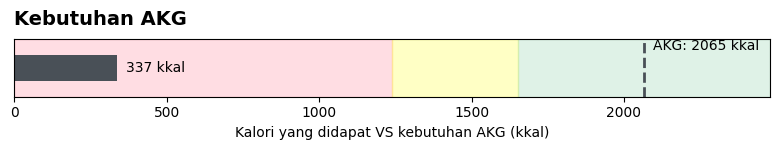

In [ ]:
k = float(gizi_dari_gambar['karbohidrat'])
p = gizi_dari_gambar['protein']
l = gizi_dari_gambar['lemak']
kal = gizi_dari_gambar['kalori']

# === INPUT DARI USER ===
print("Masukkan data diri Anda untuk menghitung kebutuhan gizi harian:")
jenis_kelamin = input("Jenis kelamin (pria/wanita): ").lower()
usia = int(input("Usia (tahun): "))
berat = float(input("Berat badan (kg): "))
tinggi = float(input("Tinggi badan (cm): "))

print("\nPilih tingkat aktivitas fisik Anda:")
print("1. Tidak aktif (1.2)")
print("2. Sedikit aktif (1.375)")
print("3. Cukup aktif (1.55)")
print("4. Aktif (1.725)")
print("5. Sangat aktif (1.9)")
aktivitas_map = {'1': 1.2, '2': 1.375, '3': 1.55, '4': 1.725, '5': 1.9}
aktivitas_input = input("Masukkan angka pilihan Anda (1-5): ")
aktivitas = aktivitas_map.get(aktivitas_input, 1.2)

# === HITUNG KEBUTUHAN KALORI ===
if jenis_kelamin == 'pria':
    bmr = 66 + (13.7 * berat) + (5 * tinggi) - (6.8 * usia)
else:
    bmr = 655 + (9.6 * berat) + (1.8 * tinggi) - (4.7 * usia)

total_kalori = round(bmr * aktivitas)

# Hitung kebutuhan makronutrien harian
karbo_kal = total_kalori * 0.60
protein_kal = total_kalori * 0.15
lemak_kal = total_kalori * 0.25

kebutuhan_karbo = karbo_kal / 4
kebutuhan_protein = protein_kal / 4
kebutuhan_lemak = lemak_kal / 9

# === RINGKASAN ===
print("\n📊 Kebutuhan Gizi Harian Anda:")
print(f"   • Kalori:      {total_kalori} kkal")
print(f"   • Karbohidrat: {kebutuhan_karbo:.1f} gram")
print(f"   • Protein:     {kebutuhan_protein:.1f} gram")
print(f"   • Lemak:       {kebutuhan_lemak:.1f} gram")

# === SELISIH GIZI YANG MASIH KURANG ===
karbo_sisa = kebutuhan_karbo - k
protein_sisa = kebutuhan_protein - p
lemak_sisa = kebutuhan_lemak - l
kalori_sisa = total_kalori - kal

# === VISUALISASI ===
# Bullet chart
print("\n🩺 Kebutuhan AKG yang terpenuhi:")
fig, ax = plt.subplots(figsize=(8, 1.6))

ax.axvspan(0, total_kalori*0.6, color='#ff8fa3', alpha=0.3, zorder=1)
ax.axvspan(total_kalori*0.6, total_kalori*0.8, color='#ffff3f', alpha=0.3, zorder=1)
ax.axvspan(total_kalori*0.8, total_kalori*1.2, color='#95d5b2', alpha=0.3, zorder=1)

ax.barh(y=0, width=total_kalori*1.2, height=0.6, color='#ffffff', zorder=0)
ax.barh(y=0, width=kal, height=0.3, color='#495057', label='Kalori Masuk')
ax.axvline(x=total_kalori, color='#495057', linestyle='--', linewidth=2, label='Target AKG')

ax.set_xlim(0, total_kalori*1.2)
ax.set_yticks([])
ax.set_title("Kebutuhan AKG", loc='left', fontsize=14, fontweight='bold', color='black', pad=10)
ax.set_xlabel('Kalori yang didapat VS kebutuhan AKG (kkal)')
ax.text(kal + 30, 0, f"{kal:.0f} kkal", va='center')
ax.text(total_kalori + 30, 0.2, f"AKG: {total_kalori} kkal", color='black')

plt.tight_layout()
plt.show()

## Rekomendasi makanan


🍽️ Rekomendasi Kombinasi Makanan:
                              Nama                   label  karbohidrat  \
302                   Bagel Gandum          makanan energi        58.41   
16                           Kurma          makanan energi        75.03   
42   Sandwich Daging Sapi Panggang  makanan pembentuk otot        19.13   
82                    Dadar Gulung  makanan pembentuk otot        28.59   
325          Kue Mentega atau Gula          makanan ringan        65.60   

     protein  lemak  
302    10.41   1.40  
16      2.45   0.39  
42     19.74   9.92  
82      4.70  11.31  
325     5.45  21.60  

📊 Total Asupan:
karbohidrat: 276.21
protein: 68.59
lemak: 56.39


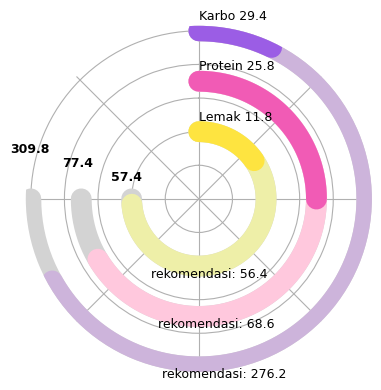

In [ ]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv("Dataset Gizi FIXX.csv")
target = {'karbohidrat': kebutuhan_karbo, 'protein': kebutuhan_protein, 'lemak': kebutuhan_lemak}
toleransi = {key: (0.8 * val, val) for key, val in target.items()}
progress = {'karbohidrat': k, 'protein':p, 'lemak': l}
kombinasi = []

def get_gap(progress, target):
    return {k: target[k] - progress[k] for k in target}

def pilih_makanan(label, df, progress, target, taken, n_top=10):
    kandidat = df[(df['label'] == label) & (~df['Nama'].isin(taken))].copy()
    if kandidat.empty:
        return None

    gap = get_gap(progress, target)
    zat_prioritas = max(gap, key=lambda k: abs(gap[k]))
    kandidat['selisih'] = kandidat[zat_prioritas].apply(lambda x: abs(x - gap[zat_prioritas]))

    kandidat_sorted = kandidat.sort_values('selisih').head(n_top)
    return kandidat_sorted.sample(1).iloc[0]

def sudah_cukup(progress, toleransi):
    return all(toleransi[k][0] <= progress[k] <= toleransi[k][1] for k in toleransi)

def proporsi(progress, target):
    return {k: progress[k] / target[k] for k in progress}

taken = []
counter_label = {'makanan energi': 0, 'makanan pembentuk otot': 0}
while not sudah_cukup(progress, toleransi):
    gap = get_gap(progress, target)
    zat_dominan = max(gap, key=lambda k: abs(gap[k]))

    # Aturan pemilihan label
    if zat_dominan == 'karbohidrat':
        label = 'makanan energi'
    elif zat_dominan == 'protein':
        label = 'makanan pembentuk otot'
    else:
        label = 'makanan ringan'

    if progress['lemak'] >= 0.7 * target['lemak']:
        label = 'makanan low-fat'

    if counter_label['makanan energi'] >= 2 :
        if counter_label['makanan pembentuk otot'] >= 2 :
            if progress['lemak'] >= 0.7 * target['lemak'] :
                label = 'makanan low-fat'
            else :
                label = 'makanan ringan'
        else :
            label = 'makanan pembentuk otot'

    makanan = pilih_makanan(label, df, progress, target, taken)
    if makanan is None:
        break

    simulasi_progress = progress.copy()
    for zat in simulasi_progress:
        simulasi_progress[zat] += makanan[zat]

    if any(simulasi_progress[k] > toleransi[k][1] for k in simulasi_progress):
        break

    kombinasi.append(makanan)
    taken.append(makanan['Nama'])

    for zat in progress:
        progress[zat] += makanan[zat]
    if label in counter_label:
        counter_label[label] += 1

def draw_radial_bar(ax, radius, percent_value, raw_value, color, label, alpha=1.0):
    theta_max = 3 * np.pi / 2
    theta_full = np.linspace(0, theta_max, 100)
    r = np.full_like(theta_full, radius)
    if alpha < 1:
        ax.plot(theta_full, r, lw=15, color=color, alpha=alpha, solid_capstyle='round')
    theta_value = np.linspace(0, theta_max * percent_value / 100, 100)
    r_value = np.full_like(theta_value, radius)
    ax.plot(theta_value, r_value, lw=15, color=color, solid_capstyle='round')

    if percent_value == 100:
        ax.text(5, radius + 0.05, f"{raw_value:.1f}", ha='center', va='center', fontsize=9, fontweight='bold')
    elif label == 'rekomendasi' :
        ax.text(3, radius + 0.05, f"{label}: {raw_value:.1f}", ha='center', va='center', fontsize=9)
    else:
        ax.text(0, radius + 0.05, f"{label} {raw_value:.1f}", ha='left', va='bottom', fontsize=9)

hasil = pd.DataFrame(kombinasi)
print("\n🍽️ Rekomendasi Kombinasi Makanan:")
print(hasil[['Nama', 'label', 'karbohidrat', 'protein', 'lemak']])
print("\n📊 Total Asupan:")
for z in progress :
    print(f"{z}: {round(progress[z], 2)}")

# === VISUALISASI ===
labels = ['Karbo', 'Protein', 'Lemak']
values = [k, p, l]
maximums = [kebutuhan_karbo, kebutuhan_protein, kebutuhan_lemak]
colors = ['#9b5de5', '#f15bb5', '#fee440']
gray_color = '#d3d3d3'
val_prediksi = {
    'karbo': progress['karbohidrat'],
    'protein': progress['protein'],
    'lemak': progress['lemak']
}
colors_prediksi = ['#cdb4db', '#ffc8dd', '#eeefa8']

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={'projection': 'polar'})
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines['polar'].set_visible(False)

radii = np.linspace(1.0, 0.4, len(values))
for i, (val, max_val, label, color, color_pred, r) in enumerate(zip(values, maximums, labels, colors, colors_prediksi, radii)):
    percent = (val / max_val) * 100
    pred_val = val_prediksi[label.lower()]
    percent_pred = (pred_val / max_val) * 100

    draw_radial_bar(ax, r, 100, max_val, gray_color, label='target', alpha=1)
    draw_radial_bar(ax, r, percent_pred, pred_val, color_pred, label='rekomendasi', alpha=1)
    draw_radial_bar(ax, r, percent, val, color, label)
plt.tight_layout()
plt.show()

#bullet
# print("\n🩺 Kebutuhan AKG yang terpenuhi:")
# fig, ax = plt.subplots(figsize=(8, 1.6))

# ax.axvspan(0, total_kalori*0.6, color='#ff8fa3', alpha=0.3, zorder=1)
# ax.axvspan(total_kalori*0.6, total_kalori*0.8, color='#ffff3f', alpha=0.3, zorder=1)
# ax.axvspan(total_kalori*0.8, total_kalori*1.2, color='#95d5b2', alpha=0.3, zorder=1)

# ax.barh(y=0, width=total_kalori*1.2, height=0.6, color='#ffffff', zorder=0)
# ax.barh(y=0, width=final_kal, height=0.3, color='#495057', label='Kalori Masuk')
# ax.axvline(x=total_kalori, color='#495057', linestyle='--', linewidth=2, label='Target AKG')

# ax.set_xlim(0, total_kalori*1.2)
# ax.set_yticks([])
# ax.set_title("Kebutuhan AKG", loc='left', fontsize=14, fontweight='bold', color='black', pad=10)
# ax.set_xlabel('Kalori yang didapat VS kebutuhan AKG (kkal)')
# ax.text(kal + 30, 0, f"{kal:.0f} kkal", va='center')
# ax.text(total_kalori + 30, 0.2, f"AKG: {total_kalori} kkal", color='black')

# plt.tight_layout()
# plt.show()

# DRAFT

## ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import numpy as np

resize_size = (224, 224)
processed_images = []
for img in augmented_images:
    img_resized = cv2.resize(img, resize_size)
    img_array = img_to_array(img_resized)
    processed_images.append(img_array)

processed_images = np.array(processed_images)
processed_images = preprocess_input(processed_images)

base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
features_cnn = base_model.predict(processed_images, batch_size=32, verbose=1)

X = features_cnn
print(f"X.shape = {X.shape}, Y.shape = {Y.shape}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step
X.shape = (1964, 2048), Y.shape = (1964, 9)


In [ ]:
import pandas as pd
import cv2
import os
import shutil

df = pd.read_csv("Label Citra - Ganti.csv")
asal_folder = '/content/drive/MyDrive/Dataset Citra 2'
tujuan_folder = '/content/drive/MyDrive/Dataset Citra NoBG'

image_names = ["image_0975.jpg"]
target_size = (224, 224)
os.makedirs(tujuan_folder, exist_ok=True)

t = 0
for name in image_names:
    asal_path = os.path.join(asal_folder, name)
    tujuan_path = os.path.join(tujuan_folder, name)

    if os.path.exists(asal_path):
        img = cv2.imread(asal_path)
        if img is not None:
            resized_img = cv2.resize(img, target_size)
            cv2.imwrite(tujuan_path, resized_img)
            t += 1
            print(t)
        else:
            print(f"Gagal membaca gambar: {asal_path}")
    else:
        print(f"Tidak ditemukan: {asal_path}")

1


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image

# Path
df = pd.read_csv("Label Citra - Sheet4.csv")
asal_folder = '/content/drive/MyDrive/Dataset Citra NoBG/Revisi'
tujuan_folder = '/content/drive/MyDrive/Dataset Citra NoBG'

# Buat folder tujuan jika belum ada
os.makedirs(tujuan_folder, exist_ok=True)

def ubah_transparan_jadi_putih_resize(img_path, save_path, ukuran=(224, 224)):
    img = Image.open(img_path).convert("RGBA")

    # Buat background putih
    background = Image.new("RGBA", img.size, (255, 255, 255, 255))
    img_white = Image.alpha_composite(background, img).convert("RGB")

    # Resize
    img_white = img_white.resize(ukuran)

    # Simpan
    img_white.save(save_path)

# Proses semua file di folder asal
for filename in os.listdir(asal_folder):
    if filename.lower().endswith('.png'):
        path_input = os.path.join(asal_folder, filename)
        path_output = os.path.join(tujuan_folder, filename.replace('.png', '.jpg'))  # simpan sebagai JPG
        try:
            ubah_transparan_jadi_putih_resize(path_input, path_output)
            print(f"✅ Berhasil proses: {filename}")
        except Exception as e:
            print(f"❌ Gagal proses {filename}: {e}")

✅ Berhasil proses: image_0656.png
✅ Berhasil proses: image_0657.png
✅ Berhasil proses: image_0658.png
✅ Berhasil proses: image_0660.png
✅ Berhasil proses: image_0663.png
✅ Berhasil proses: image_0668.png
✅ Berhasil proses: image_0671.png
✅ Berhasil proses: image_0672.png
✅ Berhasil proses: image_0673.png
✅ Berhasil proses: image_0699.png
✅ Berhasil proses: image_0700.png
✅ Berhasil proses: image_0701.png
✅ Berhasil proses: image_0705.png
✅ Berhasil proses: image_0709.png
✅ Berhasil proses: image_0711.png
✅ Berhasil proses: image_0802.png
✅ Berhasil proses: image_0817.png
✅ Berhasil proses: image_0819.png
✅ Berhasil proses: image_0821.png
✅ Berhasil proses: image_0928.png
✅ Berhasil proses: image_0936.png
✅ Berhasil proses: image_0942.png
✅ Berhasil proses: image_0944.png
✅ Berhasil proses: image_0945.png
✅ Berhasil proses: image_0952.png
✅ Berhasil proses: image_0955.png
✅ Berhasil proses: image_0956.png
✅ Berhasil proses: image_0957.png
✅ Berhasil proses: image_0968.png
✅ Berhasil pro

In [ ]:
!pip install rembg onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.8 MB/s eta 0:00:00


100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 35.8GB/s]


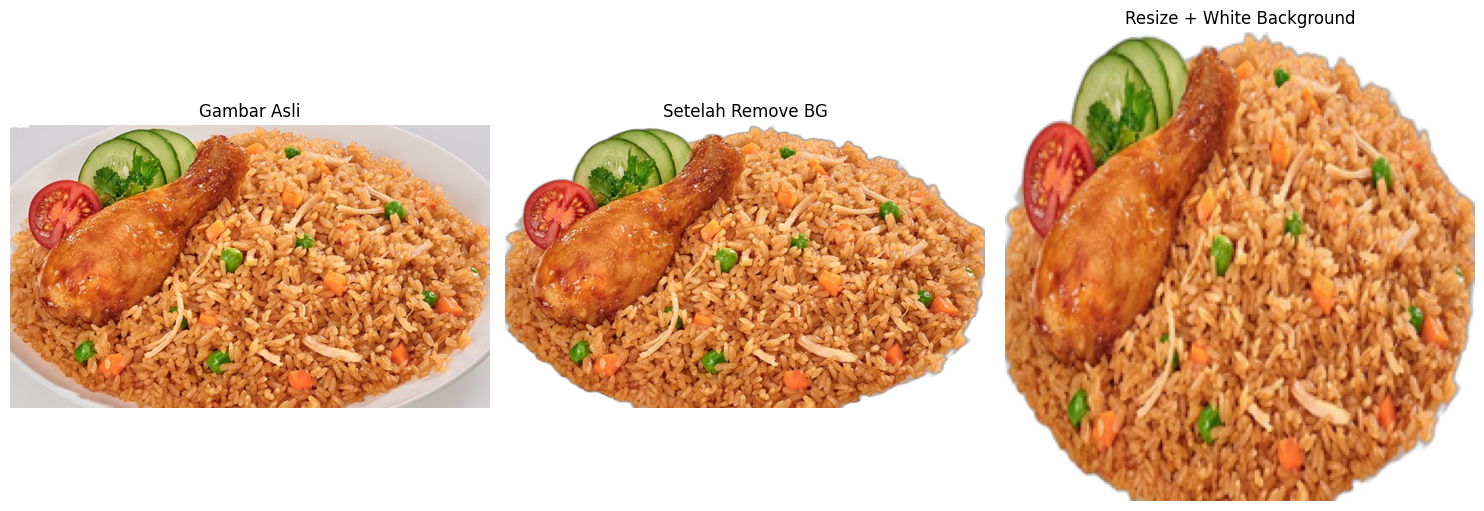

In [ ]:
import cv2
from PIL import Image
import numpy as np
import io
import matplotlib.pyplot as plt
from rembg import remove

# Input: path ke satu gambar
img_path = '/content/drive/MyDrive/Dataset Citra 2/image_0954.jpg'  # Ganti dengan nama file yang kamu inginkan
resize_size = (224, 224)

# 1. Baca gambar asli
img = cv2.imread(img_path)
if img is None:
    print("Gagal membaca gambar.")
else:
    # Konversi BGR (OpenCV) ke RGB untuk ditampilkan
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 2. Remove background
    _, buffer = cv2.imencode('.png', img)
    output_image = remove(buffer.tobytes())  # hasil berupa byte PNG dengan background transparan
    img_nobg_pil = Image.open(io.BytesIO(output_image)).convert("RGBA")

    # 3. Resize dan tambahkan background putih
    img_nobg_resized = img_nobg_pil.resize(resize_size)
    white_bg = Image.new("RGB", resize_size, (255, 255, 255))
    white_bg.paste(img_nobg_resized, mask=img_nobg_resized.split()[3])  # gunakan alpha channel sebagai mask

    # Tampilkan ketiga gambar
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img_rgb)
    axs[0].set_title("Gambar Asli")
    axs[0].axis("off")

    axs[1].imshow(img_nobg_pil)
    axs[1].set_title("Setelah Remove BG")
    axs[1].axis("off")

    axs[2].imshow(white_bg)
    axs[2].set_title("Resize + White Background")
    axs[2].axis("off")

    plt.tight_layout()
    plt.show()

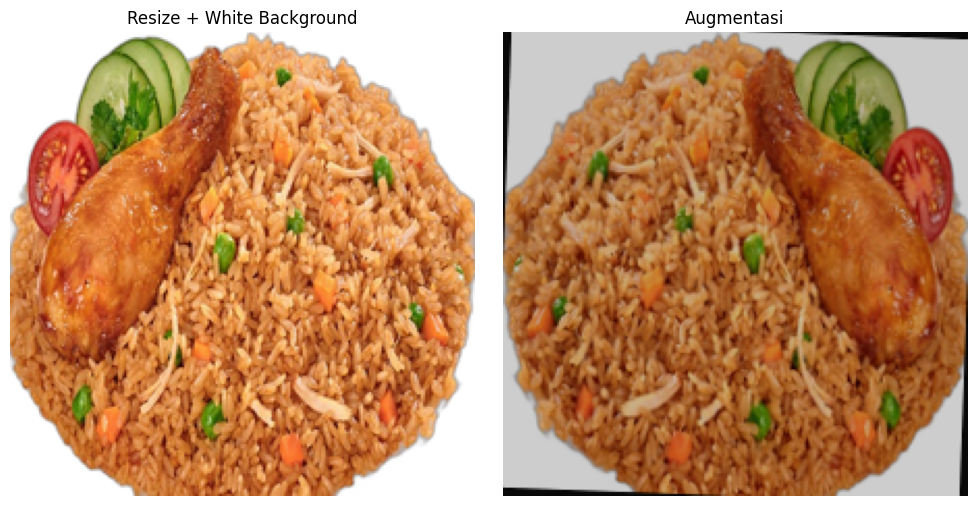

In [ ]:
import random

resized_images = []
img_resized = np.array(white_bg)
img_resized = cv2.cvtColor(img_resized, cv2.COLOR_RGB2BGR)
resized_images.append(img_resized)

# Augmentasi
img_aug = img_resized.copy()

# Flip horizontal
if random.random() > 0.5:
    img_aug = cv2.flip(img_aug, 1)

# Rotasi ±20°
angle = random.uniform(-20, 20)
h, w = img_aug.shape[:2]
M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1)
img_aug = cv2.warpAffine(img_aug, M, (w, h))

# Brightness
brightness_shift = random.randint(-40, 40)
img_aug = cv2.convertScaleAbs(img_aug, alpha=1, beta=brightness_shift)

# Kontras
contrast_factor = random.uniform(0.8, 1.2)
img_aug = cv2.convertScaleAbs(img_aug, alpha=contrast_factor, beta=0)

# Gaussian Blur
if random.random() > 0.8:
    k = random.choice([3, 5])
    img_aug = cv2.GaussianBlur(img_aug, (k, k), 0)

# Noise (Gaussian)
if random.random() > 0.7:
    noise = np.random.normal(0, 10, img_aug.shape).astype(np.uint8)
    img_aug = cv2.add(img_aug, noise)

# Zoom (crop lalu resize)
if random.random() > 0.7:
    scale = random.uniform(1.1, 1.3)
    new_w = int(w / scale)
    new_h = int(h / scale)
    x1 = random.randint(0, w - new_w)
    y1 = random.randint(0, h - new_h)
    img_aug = img_aug[y1:y1 + new_h, x1:x1 + new_w]
    img_aug = cv2.resize(img_aug, (w, h))

# Tampilkan hasilnya
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(resized_images[0], cv2.COLOR_BGR2RGB))
axs[0].set_title("Resize + White Background")
axs[0].axis("off")

axs[1].imshow(cv2.cvtColor(img_aug, cv2.COLOR_BGR2RGB))
axs[1].set_title("Augmentasi")
axs[1].axis("off")

plt.tight_layout()
plt.show()